In [2]:
import warnings
warnings.filterwarnings('default')

In [5]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

import pandas as pd

In [6]:
df = pd.read_csv('Online+Retail.csv', sep=',', encoding="ISO8859-1", header=0)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null object
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [8]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [10]:
len(df.CustomerID.unique())

4373

In [11]:
df['InvoiceDate'] = pd.to_datetime(df.InvoiceDate, format="%d-%m-%Y %H:%M")

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null datetime64[ns]
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [13]:
df.dropna(inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      406829 non-null object
StockCode      406829 non-null object
Description    406829 non-null object
Quantity       406829 non-null int64
InvoiceDate    406829 non-null datetime64[ns]
UnitPrice      406829 non-null float64
CustomerID     406829 non-null float64
Country        406829 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [16]:
df['Amount'] = df.Quantity * df.UnitPrice

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 9 columns):
InvoiceNo      406829 non-null object
StockCode      406829 non-null object
Description    406829 non-null object
Quantity       406829 non-null int64
InvoiceDate    406829 non-null datetime64[ns]
UnitPrice      406829 non-null float64
CustomerID     406829 non-null float64
Country        406829 non-null object
Amount         406829 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 31.0+ MB


#### Monetary

In [22]:
monetary = pd.DataFrame(df.groupby(by='CustomerID').Amount.sum())
monetary = monetary.reset_index()

#### Frequency 

In [23]:
freq = df[['CustomerID','InvoiceNo']]

In [25]:
k = pd.DataFrame(freq.groupby(by='CustomerID').InvoiceNo.count())
k = k.reset_index()

In [26]:
k.columns

Index(['CustomerID', 'InvoiceNo'], dtype='object')

In [27]:
k.columns = ["CustomerID", "Frequency"]

In [28]:
master = monetary.merge(k, on="CustomerID", how="inner")

#### Recency

In [29]:
rec = df[['CustomerID', "InvoiceDate"]]

In [32]:
maximum = max(rec.InvoiceDate)

In [33]:
maximum

Timestamp('2011-12-09 12:50:00')

In [35]:
maximum = maximum+pd.DateOffset(days=1)

In [36]:
rec['diff'] = maximum - rec['InvoiceDate']

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [38]:
df_diff = pd.DataFrame(rec.groupby('CustomerID').diff.min())
df_diff = df_diff.reset_index()
df_diff.columns = ["CustomerID", "Recency"]

In [39]:
df_diff.head()

,CustomerID,Recency
0,12346.0,326 days 02:33:00
1,12347.0,2 days 20:58:00
2,12348.0,75 days 23:37:00
3,12349.0,19 days 02:59:00
4,12350.0,310 days 20:49:00


In [40]:
#Combining all recency, frequency and monetary parameters
RFM = k.merge(monetary, on = "CustomerID")
RFM = RFM.merge(df_diff, on = "CustomerID")

In [41]:
RFM.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4372 entries, 0 to 4371
Data columns (total 4 columns):
CustomerID    4372 non-null float64
Frequency     4372 non-null int64
Amount        4372 non-null float64
Recency       4372 non-null timedelta64[ns]
dtypes: float64(2), int64(1), timedelta64[ns](1)
memory usage: 170.8 KB


In [42]:
RFM.head()

,CustomerID,Frequency,Amount,Recency
0,12346.0,2,0.00,326 days 02:33:00
1,12347.0,182,4310.00,2 days 20:58:00
2,12348.0,31,1797.24,75 days 23:37:00
3,12349.0,73,1757.55,19 days 02:59:00
4,12350.0,17,334.40,310 days 20:49:00


#### Outliers Treatment

{'whiskers': [<matplotlib.lines.Line2D at 0x18301556208>,
 'caps': [<matplotlib.lines.Line2D at 0x1830155e080>,
 'boxes': [<matplotlib.lines.Line2D at 0x183015565c0>],
 'medians': [<matplotlib.lines.Line2D at 0x18301529080>],
 'fliers': [<matplotlib.lines.Line2D at 0x18301a86320>],
 'means': []}

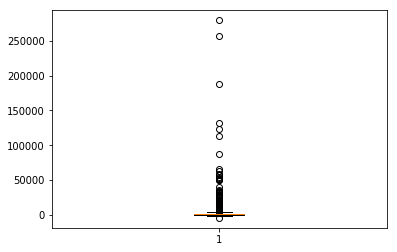

In [44]:
plt.boxplot(RFM.Amount)

In [45]:
Q1 = RFM.Amount.quantile(0.25)
Q3 = RFM.Amount.quantile(0.75)
IQR = Q3 - Q1

print(Q1, Q3, IQR)

293.36250000000007 1611.7249999999995 1318.3624999999993


In [46]:
RFM = RFM[(RFM.Amount >= Q1 - 1.5*IQR) & (RFM.Amount <= Q3 + 1.5*IQR)]

{'whiskers': [<matplotlib.lines.Line2D at 0x183048295c0>,
 'caps': [<matplotlib.lines.Line2D at 0x1830197d7b8>,
 'boxes': [<matplotlib.lines.Line2D at 0x18304829940>],
 'medians': [<matplotlib.lines.Line2D at 0x1830153a6a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x18303449eb8>],
 'means': []}

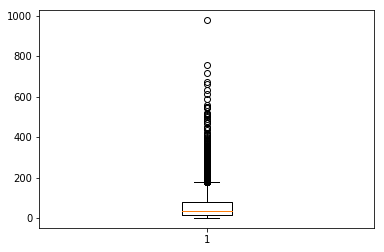

In [47]:
plt.boxplot(RFM.Frequency)

In [48]:
Q1 = RFM.Frequency.quantile(0.25)
Q3 = RFM.Frequency.quantile(0.75)
IQR = Q3 - Q1

print(Q1, Q3, IQR)

16.0 81.0 65.0


In [49]:
RFM = RFM[(RFM.Frequency >= Q1 - 1.5*IQR) & (RFM.Frequency <= Q3 + 1.5*IQR)]

C:\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1222: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if stats['iqr'] == 0 and autorange:


{'whiskers': [<matplotlib.lines.Line2D at 0x18304cd6a58>,
 'caps': [<matplotlib.lines.Line2D at 0x183049a76a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x18304f8c160>],
 'medians': [<matplotlib.lines.Line2D at 0x18304efa438>],
 'fliers': [<matplotlib.lines.Line2D at 0x18304efaf98>],
 'means': []}

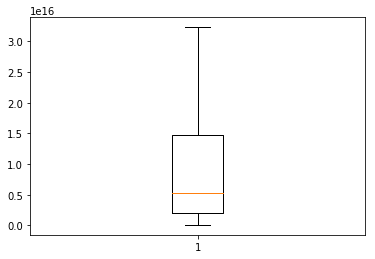

In [50]:
plt.boxplot(RFM.Recency)

In [53]:
Q1 = RFM.Recency.quantile(0.25)
Q3 = RFM.Recency.quantile(0.75)
IQR = Q3 - Q1

print(Q1, Q3, IQR)

23 days 02:41:00 170 days 03:42:00 147 days 01:01:00


In [54]:
RFM = RFM[(RFM.Recency >= Q1 - 1.5*IQR) & (RFM.Recency <= Q3 + 1.5*IQR)]

In [55]:
RFM.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3697 entries, 0 to 4371
Data columns (total 4 columns):
CustomerID    3697 non-null float64
Frequency     3697 non-null int64
Amount        3697 non-null float64
Recency       3697 non-null timedelta64[ns]
dtypes: float64(2), int64(1), timedelta64[ns](1)
memory usage: 144.4 KB


In [56]:
RFM.describe()

,CustomerID,Frequency,Amount,Recency
count,3697.000000,3697.000000,3697.000000,3697
mean,15307.517176,46.658101,771.363098,104 days 19:06:29.797132
std,1717.432301,41.705211,740.646223,103 days 19:11:58.000039
min,12346.000000,1.000000,-1592.490000,1 days 00:00:00
25%,13822.000000,15.000000,248.100000,23 days 02:41:00
50%,15308.000000,32.000000,508.460000,61 days 04:27:00
75%,16784.000000,68.000000,1046.560000,170 days 03:42:00
max,18287.000000,178.000000,3563.850000,374 days 02:57:00


In [57]:
RFM.head()

,CustomerID,Frequency,Amount,Recency
0,12346.0,2,0.00,326 days 02:33:00
2,12348.0,31,1797.24,75 days 23:37:00
3,12349.0,73,1757.55,19 days 02:59:00
4,12350.0,17,334.40,310 days 20:49:00
5,12352.0,95,1545.41,36 days 22:13:00


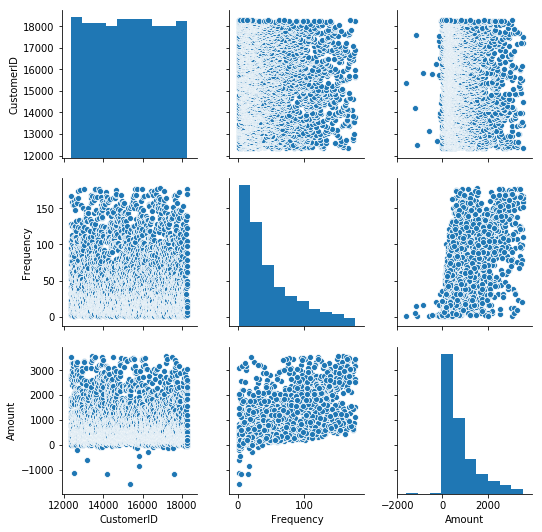

In [59]:
sns.pairplot(data=RFM)

In [60]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [61]:
RFM_final = RFM.drop(labels='CustomerID', axis=1)

In [63]:
RFM_final['Recency']= RFM_final.Recency.dt.days

In [66]:
RFM_final.head()

,Frequency,Amount,Recency
0,2,0.00,326
2,31,1797.24,75
3,73,1757.55,19
4,17,334.40,310
5,95,1545.41,36


In [67]:
RFM_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3697 entries, 0 to 4371
Data columns (total 3 columns):
Frequency    3697 non-null int64
Amount       3697 non-null float64
Recency      3697 non-null int64
dtypes: float64(1), int64(2)
memory usage: 275.5 KB


In [70]:
RFM_final.describe()

,Frequency,Amount,Recency
count,3697.000000,3697.000000,3697.000000
mean,46.658101,771.363098,104.272383
std,41.705211,740.646223,103.798588
min,1.000000,-1592.490000,1.000000
25%,15.000000,248.100000,23.000000
50%,32.000000,508.460000,61.000000
75%,68.000000,1046.560000,170.000000
max,178.000000,3563.850000,374.000000


In [69]:
scaler = StandardScaler()

In [73]:
RFM_final = scaler.fit_transform(RFM_final)

C:\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [75]:
RFM_final

array([[-1.07094871, -1.04161396,  2.13642223],
       [-0.3754979 ,  1.38529792, -0.28204953],
       [ 0.63170672,  1.33170234, -0.82162889],
       ...,
       [-0.9510434 , -0.93247827,  0.73929711],
       [-0.80715703, -0.80314128, -0.92761769],
       [ 0.55976353,  1.43936613, -0.59038059]])

In [76]:
RFM_final = pd.DataFrame(RFM_final)
RFM_final.columns = ['Frequency','Amount','Recency']
RFM_final.head()

,Frequency,Amount,Recency
0,-1.070949,-1.041614,2.136422
1,-0.375498,1.385298,-0.282050
2,0.631707,1.331702,-0.821629
3,-0.711233,-0.590055,1.982257
4,1.159290,1.045238,-0.657828


In [77]:
RFM_final.describe()

,Frequency,Amount,Recency
count,3.697000e+03,3.697000e+03,3.697000e+03
mean,-4.417468e-17,3.405445e-17,-2.672704e-18
std,1.000135e+00,1.000135e+00,1.000135e+00
min,-1.094930e+00,-3.192041e+00,-9.950651e-01
25%,-7.591949e-01,-7.065909e-01,-7.830875e-01
50%,-3.515168e-01,-3.550125e-01,-4.169444e-01
75%,5.118014e-01,3.716135e-01,6.333083e-01
max,3.149718e+00,3.770848e+00,2.598919e+00


In [79]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan

In [81]:
def hopkins(X):
    d = X.shape[1]
    n = len(X)
    m = int(.1*n)
    
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
    
    rand_X = sample(range(0,n,1),m)
    
    ujd = []
    wjd = []
    
    for j in range(0,m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [82]:
hopkins(RFM_final)

0.8874847622782691

In [83]:
model_kmeans1 =KMeans(n_clusters=5, max_iter=100)

In [84]:
model_kmeans1.fit(RFM_final)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [85]:
from sklearn.metrics import silhouette_score

In [86]:
sse_ = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k).fit(RFM_final)
    sse_.append([k, silhouette_score(RFM_final, kmeans.labels_)])

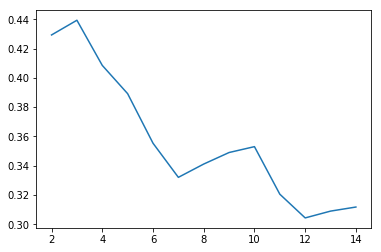

In [87]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

sum of square distances

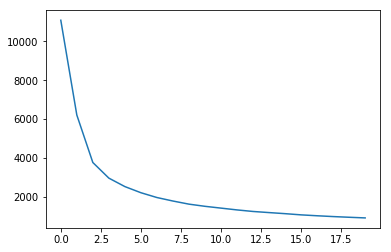

In [89]:
# sum of squared distances
ssd = []
for num_clusters in list(range(1,21)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(RFM_final)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)

In [91]:
# analysis of clusters formed
RFM.index = pd.RangeIndex(len(RFM.index))
RFM_km = pd.concat([RFM, pd.Series(model_kmeans1.labels_)], axis=1)
RFM_km.columns = ['CustomerID', 'Frequency', 'Amount', 'Recency', 'ClusterID']

RFM_km.Recency = RFM_km.Recency.dt.days
km_clusters_amount = 	pd.DataFrame(RFM_km.groupby(["ClusterID"]).Amount.mean())
km_clusters_frequency = 	pd.DataFrame(RFM_km.groupby(["ClusterID"]).Frequency.mean())
km_clusters_recency = 	pd.DataFrame(RFM_km.groupby(["ClusterID"]).Recency.mean())

In [92]:
df = pd.concat([pd.Series([0,1,2,3,4]), km_clusters_amount, km_clusters_frequency, km_clusters_recency], axis=1)
df.columns = ["ClusterID", "Amount_mean", "Frequency_mean", "Recency_mean"]
df.head()

,ClusterID,Amount_mean,Frequency_mean,Recency_mean
0,0,357.594530,23.325785,57.572681
1,1,327.037096,20.558856,262.393839
2,2,913.691366,114.125683,54.122951
3,3,2471.402482,117.888283,38.198910
4,4,1200.422727,53.701166,50.049563


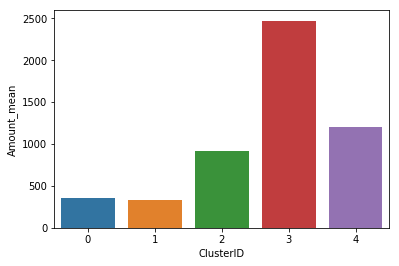

In [93]:
sns.barplot(x=df.ClusterID, y=df.Amount_mean)


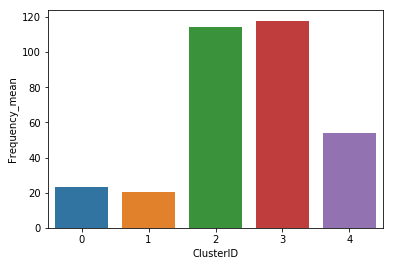

In [94]:
sns.barplot(x=df.ClusterID, y=df.Frequency_mean)

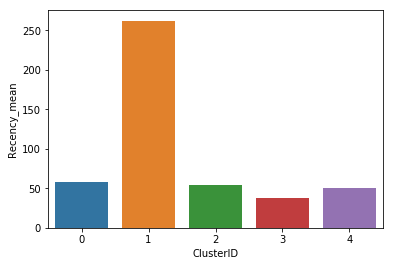

In [95]:
sns.barplot(x=df.ClusterID, y=df.Recency_mean)